# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 4</center></span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.
Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

$\rho k_B T$ è il contributo cinetico alla pressione

### Equilibration is needed!

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$.Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.

### Exercise 04.2

By means of your upgraded code, perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
from matplotlib import ticker
import seaborn as sns

#define reduced units
k_b = 1.380649 * 10**(-23) #(J/K)ù
epsilon = 120 * k_b  #(joule)
sigma = 0.34 * 10**(-9) #(m)
m = 6.634 * 10**(-26) #(kg)

Text(0.5, 0.92, 'Initial Configuration')

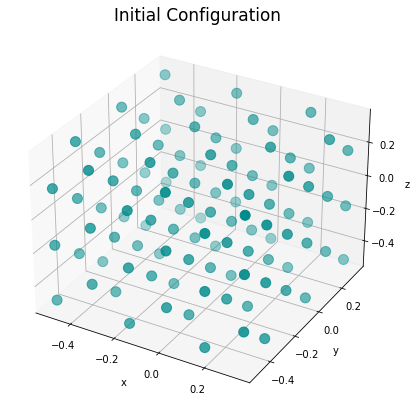

In [3]:
from mpl_toolkits import mplot3d
x,y,z = np.loadtxt("config.fcc", dtype = float, usecols=(0,1,2), unpack=True)

fig = plt.figure(figsize = (10, 7))
ax3D = plt.axes(projection ="3d")
ax3D.scatter(x,y,z, marker="o", s=100, color="darkcyan")
ax3D.set_xlabel("x")
ax3D.set_ylabel("y")
ax3D.set_zlabel("z")
plt.title("Initial Configuration", fontsize = 17)

## <center> Equilibration </center>

### Solid state

Trial 1:
	Temperatura media dopo 10^4 step:	0.4097247375
	Nuova T iniziale:	1.1902752625000002
Trial 2:
	Temperatura media dopo 10^4 step:	0.61348784
	Nuova T iniziale:	1.3767874225
Trial 3:
	Temperatura media dopo 10^4 step:	0.7120368378
	Nuova T iniziale:	1.4647505847
Trial 4:
	Temperatura media dopo 10^4 step:	0.7575894646
	Nuova T iniziale:	1.5071611201000001
Trial 5:
	Temperatura media dopo 10^4 step:	0.780559828
	Nuova T iniziale:	1.5266012921
Trial 6:
	Temperatura media dopo 10^4 step:	0.7901778904
	Nuova T iniziale:	1.5364234017
Trial 7:
	Temperatura media dopo 10^4 step:	0.7959094227
	Nuova T iniziale:	1.540513979
Trial 8:
	Temperatura media dopo 10^4 step:	0.7981428691
	Nuova T iniziale:	1.5423711099
Trial 9:
	Temperatura media dopo 10^4 step:	0.7993464107
	Nuova T iniziale:	1.5430246992
Trial 10:
	Temperatura media dopo 10^4 step:	0.7997584057
	Nuova T iniziale:	1.5432662935


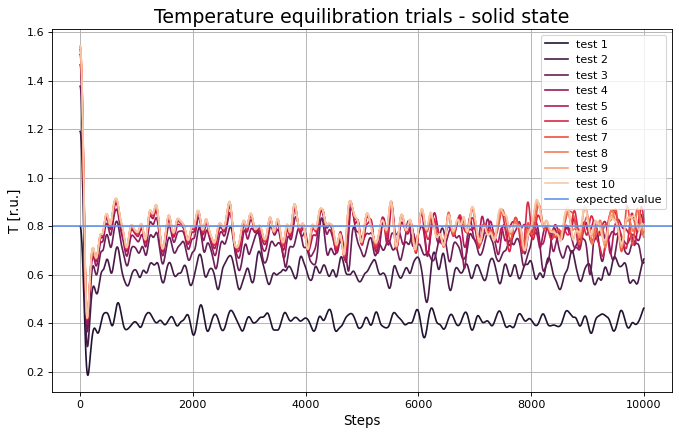

In [4]:
path1 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test1.dat"
step, T_appo1 = np.loadtxt(path1, dtype = float, usecols=(0,1), unpack=True, delimiter=",")
path2 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test2.dat"
T_appo2 = np.loadtxt(path2, dtype = float, usecols=(1), unpack=True, delimiter=",")
path3 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test3.dat"
T_appo3 = np.loadtxt(path3, dtype = float, usecols=(1), unpack=True, delimiter=",")
path4 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test4.dat"
T_appo4 = np.loadtxt(path4, dtype = float, usecols=(1), unpack=True, delimiter=",")
path5 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test5.dat"
T_appo5 = np.loadtxt(path5, dtype = float, usecols=(1), unpack=True, delimiter=",")
path6 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test6.dat"
T_appo6 = np.loadtxt(path6, dtype = float, usecols=(1), unpack=True, delimiter=",")
path7 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test7.dat"
T_appo7 = np.loadtxt(path7, dtype = float, usecols=(1), unpack=True, delimiter=",")
path8 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test8.dat"
T_appo8 = np.loadtxt(path8, dtype = float, usecols=(1), unpack=True, delimiter=",")
path9 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test9.dat"
T_appo9 = np.loadtxt(path9, dtype = float, usecols=(1), unpack=True, delimiter=",")
path10 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/solid_equil_test10.dat"
T_appo10 = np.loadtxt(path10, dtype = float, usecols=(1), unpack=True, delimiter=",")

#mean temperature
T_appomean = np.mean(T_appo1)
print('Trial 1:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T = 0.8 + (0.8-T_appomean)
print('\tNuova T iniziale:\t' + str (T) )
#trial 2
T_appomean = np.mean(T_appo2)
print('Trial 2:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 3
T_appomean = np.mean(T_appo3)
print('Trial 3:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 4
T_appomean = np.mean(T_appo4)
print('Trial 4:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 5
T_appomean = np.mean(T_appo5)
print('Trial 5:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 6
T_appomean = np.mean(T_appo6)
print('Trial 6:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 7
T_appomean = np.mean(T_appo7)
print('Trial 7:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 8
T_appomean = np.mean(T_appo8)
print('Trial 8:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 9
T_appomean = np.mean(T_appo9)
print('Trial 9:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 10
T_appomean = np.mean(T_appo10)
print('Trial 10:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 0.8-T_appomean
print('\tNuova T iniziale:\t' + str (T) )

figure(figsize=(10,6), dpi=80)
sns.set_palette( sns.color_palette( palette="rocket", n_colors=10 ) )
plt.plot(step,T_appo1, label="test 1") #color="red",
plt.plot(step,T_appo2, label="test 2") #color="mediumslateblue",
plt.plot(step,T_appo3, label="test 3") #color="dodgerblue",
plt.plot(step,T_appo4, label="test 4") #color="orangered",
plt.plot(step,T_appo5, label="test 5") #color="mediumvioletred",
plt.plot(step,T_appo6, label="test 6") #color="lime",
plt.plot(step,T_appo7, label="test 7") #color="gold",
plt.plot(step,T_appo8, label="test 8") #color="darkturquoise",
plt.plot(step,T_appo9, label="test 9") # color="chocolate",
plt.plot(step,T_appo10, label="test 10") #color="limegreen",
plt.xlabel('Steps', fontsize = 12)
plt.ylabel('T [r.u.]', fontsize = 12)
plt.title('Temperature equilibration trials - solid state', fontsize = 17)
plt.axhline(0.8, color ="cornflowerblue", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

### Liquid state

Trial 1:
	Temperatura media dopo 10^4 step:	0.5730771504000001
	Nuova T iniziale:	1.6269228496
Trial 2:
	Temperatura media dopo 10^4 step:	0.8857947446
	Nuova T iniziale:	1.8411281050000001
Trial 3:
	Temperatura media dopo 10^4 step:	1.0158959953000002
	Nuova T iniziale:	1.9252321097
Trial 4:
	Temperatura media dopo 10^4 step:	1.0158959953000002
	Nuova T iniziale:	2.0093361144
Trial 5:
	Temperatura media dopo 10^4 step:	1.1236324082
	Nuova T iniziale:	1.9857037062
Trial 6:
	Temperatura media dopo 10^4 step:	1.1083884822999999
	Nuova T iniziale:	1.9773152239000003
Trial 7:
	Temperatura media dopo 10^4 step:	1.0971159481000001
	Nuova T iniziale:	1.9801992758000002
Trial 8:
	Temperatura media dopo 10^4 step:	1.1079640299
	Nuova T iniziale:	1.9722352459000003


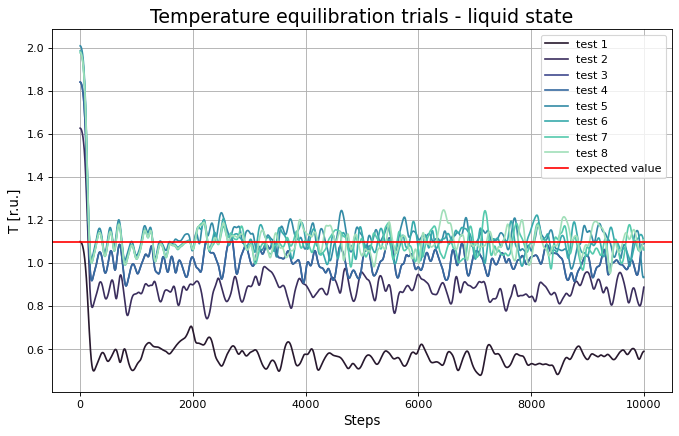

In [5]:
path1 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test1.dat"
step, T_appo1 = np.loadtxt(path1, dtype = float, usecols=(0,1), unpack=True, delimiter=",")
path2 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test2.dat"
T_appo2 = np.loadtxt(path2, dtype = float, usecols=(1), unpack=True, delimiter=",")
path3 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test3.dat"
T_appo3 = np.loadtxt(path3, dtype = float, usecols=(1), unpack=True, delimiter=",")
path4 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test4.dat"
T_appo4 = np.loadtxt(path4, dtype = float, usecols=(1), unpack=True, delimiter=",")
path5 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test5.dat"
T_appo5 = np.loadtxt(path5, dtype = float, usecols=(1), unpack=True, delimiter=",")
path6 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test6.dat"
T_appo6 = np.loadtxt(path6, dtype = float, usecols=(1), unpack=True, delimiter=",")
path7 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test7.dat"
T_appo7 = np.loadtxt(path7, dtype = float, usecols=(1), unpack=True, delimiter=",")
path8 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/liquid_equil_test8.dat"
T_appo8 = np.loadtxt(path8, dtype = float, usecols=(1), unpack=True, delimiter=",")

#mean temperature
T_appomean = np.mean(T_appo1)
print('Trial 1:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T = 1.1 + (1.1-T_appomean)
print('\tNuova T iniziale:\t' + str (T) )
#trial 2
T_appomean = np.mean(T_appo2)
print('Trial 2:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 3
T_appomean = np.mean(T_appo3)
print('Trial 3:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 4
T_appomean = np.mean(T_appo4)
print('Trial 4:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 5
T_appomean = np.mean(T_appo5)
print('Trial 5:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 6
T_appomean = np.mean(T_appo6)
print('Trial 6:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 7
T_appomean = np.mean(T_appo7)
print('Trial 7:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 8
T_appomean = np.mean(T_appo8)
print('Trial 8:\n\tTemperatura media dopo 10^4 step:\t' + str(T_appomean) )
T += 1.1-T_appomean
print('\tNuova T iniziale:\t' + str (T) )

figure(figsize=(10,6), dpi=80)
sns.set_palette( sns.color_palette( palette="mako", n_colors=8 ) )
plt.plot(step,T_appo1, label="test 1")
plt.plot(step,T_appo2, label="test 2")
plt.plot(step,T_appo3, label="test 3")
plt.plot(step,T_appo4, label="test 4")
plt.plot(step,T_appo5, label="test 5")
plt.plot(step,T_appo6, label="test 6")
plt.plot(step,T_appo7, label="test 7")
plt.plot(step,T_appo8, label="test 8")

plt.xlabel('Steps', fontsize = 12)
plt.ylabel('T [r.u.]', fontsize = 12)
plt.title('Temperature equilibration trials - liquid state', fontsize = 17)
plt.axhline(1.1, color ="red", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

### Gaseous state

Trial 1:
	Temperatura media dopo 10^5 step:	1.4195238021
	Nuova T iniziale:	0.9804761978999998
Trial 2:
	Temperatura media dopo 10^5 step:	1.2169583806400002
	Nuova T iniziale:	0.9635178172599996
Trial 3:
	Temperatura media dopo 10^5 step:	1.19462680364
	Nuova T iniziale:	0.9688910136199995
Trial 4:
	Temperatura media dopo 10^5 step:	1.2046333160699998
	Nuova T iniziale:	0.9642576975499997
Trial 5:
	Temperatura media dopo 10^5 step:	1.19969857511
	Nuova T iniziale:	0.9645591224399996


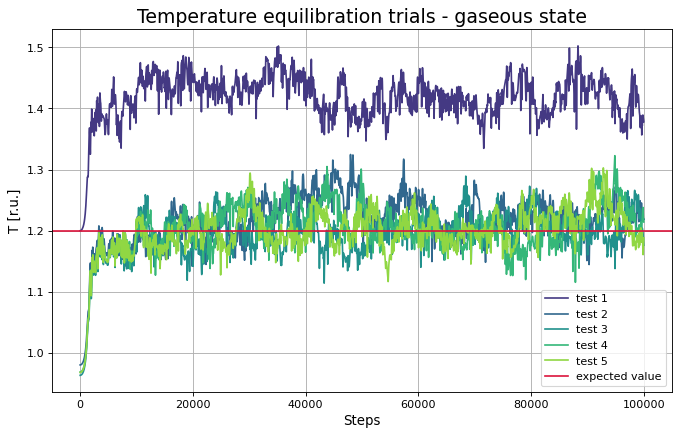

In [6]:
path1 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/gas_equil_test1.dat"
step, T_appo1 = np.loadtxt(path1, dtype = float, usecols=(0,1), unpack=True, delimiter=",")
path2 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/gas_equil_test2.dat"
T_appo2 = np.loadtxt(path2, dtype = float, usecols=(1), unpack=True, delimiter=",")
path3 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/gas_equil_test3.dat"
T_appo3 = np.loadtxt(path3, dtype = float, usecols=(1), unpack=True, delimiter=",")
path4 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/gas_equil_test4.dat"
T_appo4 = np.loadtxt(path4, dtype = float, usecols=(1), unpack=True, delimiter=",")
path5 = "/home/stapan/Desktop/Numeric Simulation Lab/Exercise_04/equilibration_folder/gas_equil_test5.dat"
T_appo5 = np.loadtxt(path5, dtype = float, usecols=(1), unpack=True, delimiter=",")

#mean temperature
T_appomean = np.mean(T_appo1)
print('Trial 1:\n\tTemperatura media dopo 10^5 step:\t' + str(T_appomean) )
T = 1.2 + (1.2-T_appomean)
print('\tNuova T iniziale:\t' + str (T) )
#trial 2
T_appomean = np.mean(T_appo2)
print('Trial 2:\n\tTemperatura media dopo 10^5 step:\t' + str(T_appomean) )
T += 1.2-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 3
T_appomean = np.mean(T_appo3)
print('Trial 3:\n\tTemperatura media dopo 10^5 step:\t' + str(T_appomean) )
T += 1.2-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 4
T_appomean = np.mean(T_appo4)
print('Trial 4:\n\tTemperatura media dopo 10^5 step:\t' + str(T_appomean) )
T += 1.2-T_appomean
print('\tNuova T iniziale:\t' + str (T) )
#trial 5
T_appomean = np.mean(T_appo5)
print('Trial 5:\n\tTemperatura media dopo 10^5 step:\t' + str(T_appomean) )
T += 1.2-T_appomean
print('\tNuova T iniziale:\t' + str (T) )

figure(figsize=(10,6), dpi=80)
sns.set_palette( sns.color_palette( palette="viridis", n_colors=5 ) )
plt.plot(step,T_appo1, label="test 1")
plt.plot(step,T_appo2, label="test 2")
plt.plot(step,T_appo3, label="test 3")
plt.plot(step,T_appo4, label="test 4")
plt.plot(step,T_appo5, label="test 5")

plt.xlabel('Steps', fontsize = 12)
plt.ylabel('T [r.u.]', fontsize = 12)
plt.title('Temperature equilibration trials - gaseous state', fontsize = 17)
plt.axhline(1.2, color ="crimson", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

I grafico mostrano i diversi tentativi di ricerca della temperatura di partenza per l'equilibrazione di un sistema solido, liquido e gassoso di 108 particelle in ensemble microcanonico. Il sistema è evoluto con una variante dell'algoritmo di Verlet.

Nell'ipotesi di ensemble microcanonico il numero di particelle e l'energia del sistema rimangono costanti: ciò significa che l'equilibrazione del sistema deve portare lo stesso ad avere energia costante. L'equilibrazione è necessaria in quanto il sistema è inizializzato alla configurazione di un cristallo perfetto: questa è un minimo dell'energia potenziale del sistema quindi, quando il sistema evolve aumenta la propria energia potenziale, diminuendo così la temperatura e l'energia cinetica poichè l'energia totale deve rimanere costante. <br>
Ora, questo è vero per lo stato solido e per quello liquido. Nello lo stato gassoso, invece, è facile osservare dal grafico che la temperatura aumenta durante i primi step: oltre alla configurazione fcc del cristallo entra in gioco la distanza tra le particelle nel calcolo del potenziale.<br>
Il codice utilizza un box di simulazione di lato $L_{box} = \frac{N_{particelle}}{\rho}$ dove $\rho$ è la densità dello stato. A parità di numero di particelle, la densità dello stato gassoso è molto minore di quella degli altri due stati: $$\rho_{solid} = 1.1\:r.u. \quad \rho_{liquid} = 0.8\:r.u. \quad \rho_{gas} = 0.05\:r.u.$$ ciò significa che le particelle dello stato gassoso sono distanti fra loro, molto più di quelle dello stato liquido e solido. <br>
Poichè il potenziale usato per la simulazione è quello di Lennard-Jones, particelle distanti tra loro subiscono un potenziale attrattivo che le porta verso il minimo della buca: quindi, nei primi step, l'energia potenziale del sistema gassoso diminuisce e l'energia cinetica (velocità delle particelle e quindi temperatura) aumenta.

Un metodo per equilibrare un sistema evoluto con l'algoritmo di Verlet consiste nell'evolvere il sistema per pochi passi (comunque un numero tale di passi così che non siano correlati) e, alla fine di questi, riscalare le velocità delle singole molecole in modo tale che il sistema abbia la temperatura voluta. Ripetendo il procedimento il sistema evolve a temperatura costante, arrivando ad uno stato termodinamicamente stabile alla temperatura voluto ed è così equilibrato.

La variante dell'algoritmo di Verlet qui utilizzata non permette, però, l'implentazione di tale metodo, a meno di importanti variazioni del codice. <br>
Per ovviare a ciò sfruttiamo il fatto che in questo ensemble solamente l'energia totale del sistema deve rimanere costante, non la temperatura: equilibrare significa allora trovare la temperatura iniziale tale che, evolvendo, il sistema si stabilizzi alla temperatura voluta e da essa evolva senza forti oscillazioni.

Per fare questo ho fatto evolvere il sistema per $10^4$ step ($10^5$ nel caso dello stato gassoso perchè in questo stato il sistema è molto più disordinato del cristallo perfetto e impiega più tempo per stabilizzarsi), monitorando l'andamento della temperatura. Ho quindi mediato su tutte le temperature raggiunte dal sistema e calcolato la differenza tra la media delle temperature raggiunte e la temperatura voluta (in unità ridotte, 0.8 per la fase solida, 1.1 per il la fase liquida e 1.2 per quella gassosa). La nuova temperatura iniziale con cui ripetere il processo è data dalla somma tra questa differenza e la vecchia temperatura iniziale. In questo modo la temperatura media del sistema si avvicina progressivamente al valore voluto. <br>
Il metodo può essere ripetute molte volte sperando di avere un'accuratezza maggiore: quello che si osserva in realtà è che, dopo alcune ripetizioni, il valore medio della temperatura oscilla attorno al valore voluto (con oscillazioni di circa $10^{-3}$ r.u.): questo è dovuto al fatto che la temperatura sia una media su tutti gli step compiuti. Ho quindi smesso di ripetere il metodo dopo un numero arbitrario di volte per ogni fase.

## <center> Argon simulation in different thermodynamical states <center>

## Solid state

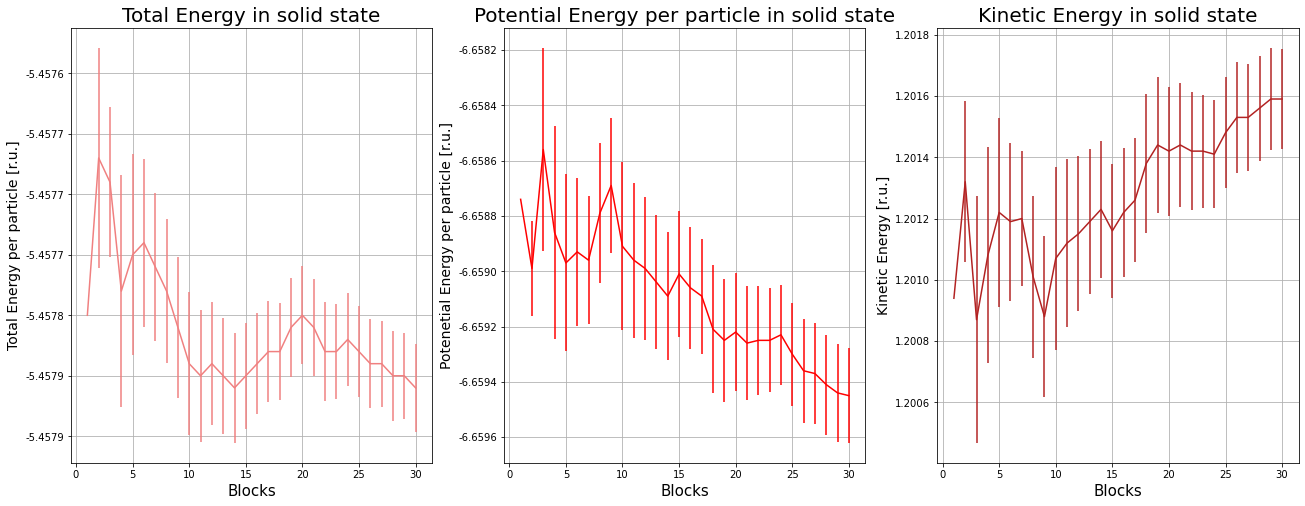

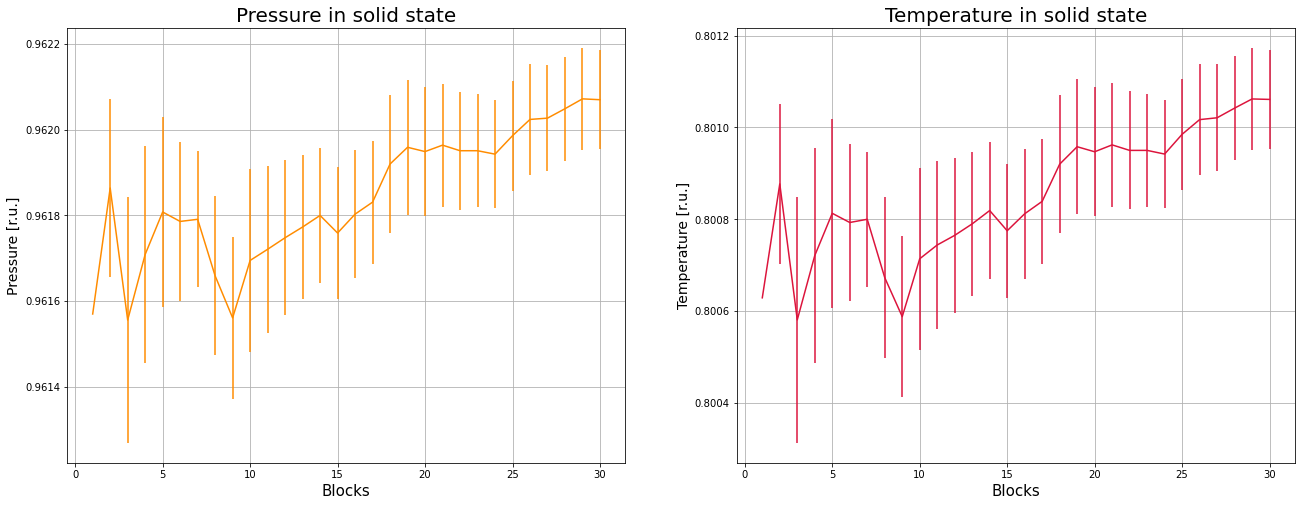

In [6]:
#import data for solid simulation
n_block, etot, err_etot = np.loadtxt("data_folder/solid_etot.dat" , dtype = float , usecols=(0,2,3) , unpack='true', delimiter=",")
epot, err_epot = np.loadtxt("data_folder/solid_epot.dat" , dtype = float , usecols=(2,3) , unpack='true', delimiter=",")
ekin, err_ekin = np.loadtxt("data_folder/solid_ekin.dat" , dtype = float , usecols=(2,3) , unpack='true', delimiter=",")
press, err_press = np.loadtxt("data_folder/solid_press.dat" , dtype = float , usecols=(2,3) , unpack='true', delimiter=",")
temp, err_temp = np.loadtxt("data_folder/solid_temp.dat" , dtype = float , usecols=(2,3) , unpack='true', delimiter=",")

#energy plots
fig, [ax0 , ax1 , ax2]   = plt.subplots(1, 3, figsize=(22 , 8))
ax0.errorbar( n_block, etot , yerr=err_etot , color="lightcoral")
ax1.errorbar( n_block, epot , yerr=err_epot , color="r")
ax2.errorbar( n_block, ekin , yerr=err_ekin, color="firebrick")

ax0.set_title("Total Energy in solid state", fontsize = 20)
ax0.set_ylabel("Total Energy per particle [r.u.]", fontsize = 14)
ax1.set_title("Potential Energy per particle in solid state", fontsize = 20)
ax1.set_ylabel("Potenetial Energy per particle [r.u.]", fontsize = 14)
ax2.set_title("Kinetic Energy in solid state", fontsize = 20)
ax2.set_ylabel("Kinetic Energy [r.u.]", fontsize = 14)
for i in range(3):
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].grid(True)
    globals()['ax'+str(i)].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))

#temperature and pressure plots
fig, [ax0 , ax1]   = plt.subplots(1, 2, figsize=(22 , 8))
ax0.errorbar( n_block, press , yerr=err_press , color="darkorange")
ax1.errorbar( n_block, temp , yerr=err_temp , color="crimson")

ax0.set_title("Pressure in solid state", fontsize = 20)
ax0.set_ylabel("Pressure [r.u.]", fontsize = 14)
ax1.set_title("Temperature in solid state", fontsize = 20)
ax1.set_ylabel("Temperature [r.u.]", fontsize = 14)
#ax1.axhline(0.8, color ="navy", label = "expected value")

for i in range(3):
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].grid(True)
    globals()['ax'+str(i)].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))

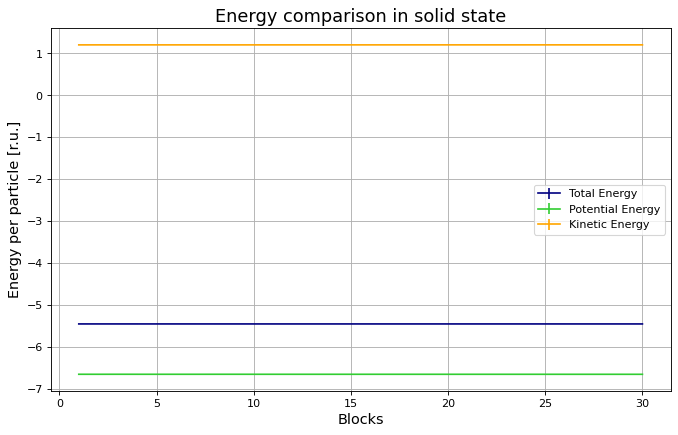

In [7]:
#energy comparison plots
figure(figsize=(10,6), dpi=80)
plt.errorbar(n_block, etot, yerr=err_etot, color="navy" , label="Total Energy" )
plt.errorbar(n_block, epot, yerr=err_epot , color="limegreen" , label="Potential Energy" )
plt.errorbar(n_block, ekin, yerr=err_ekin, color="orange" , label="Kinetic Energy" )
plt.xlabel('Blocks', fontsize = 13)
plt.ylabel('Energy per particle [r.u.]', fontsize = 13)
plt.title('Energy comparison in solid state' , fontsize = 16)
plt.grid(True)
plt.legend(loc="best")
plt.show()

La fase solida dell'Argon è stata simulata a $T = 0.8\,r.u. = 96\,K$, con $\rho = 1.1\:r.u. \approx 0.043 \cdot 10^{-27}\, m^{-3}$ e $r_{cutoff} = 2.2\,r.u. = 0.75\,nm$. Il grafico di paragone delle energie mostra la conservazione dell'energia totale, cinetica e potenziale. <br>
La simulazione è stata eseguita con $30$ blocchi da $2\cdot10^4$ step ciascuno. Poichè ogni step è un'evoluzione di $t = 5\cdot10^{-4}\:r.u.$ il tempo totale della simulazione è $t \approx 0,12\:ns$.

## Liquid state

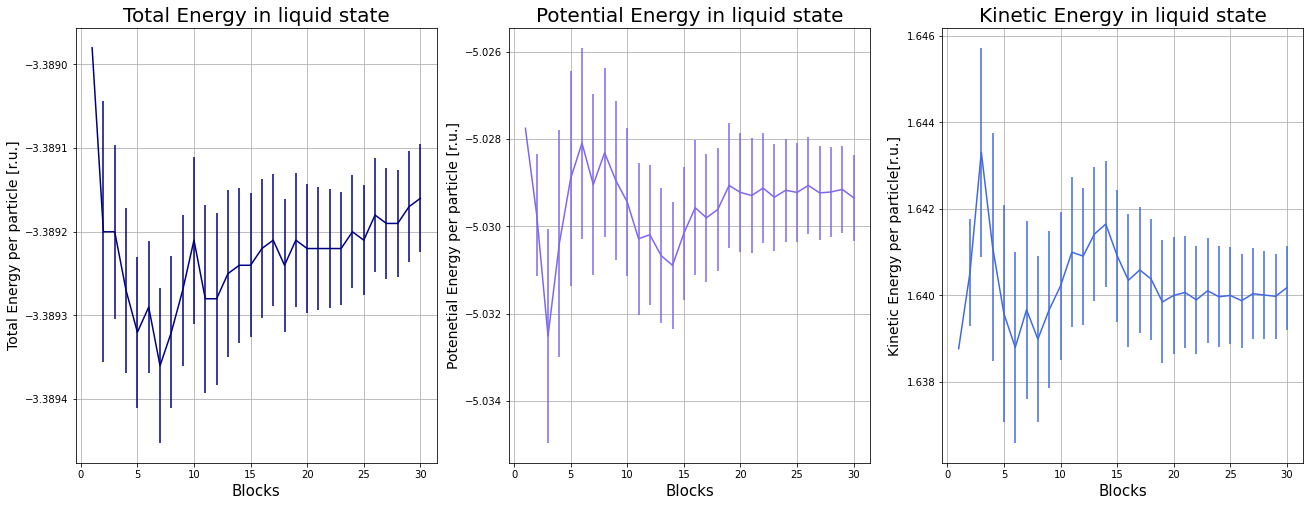

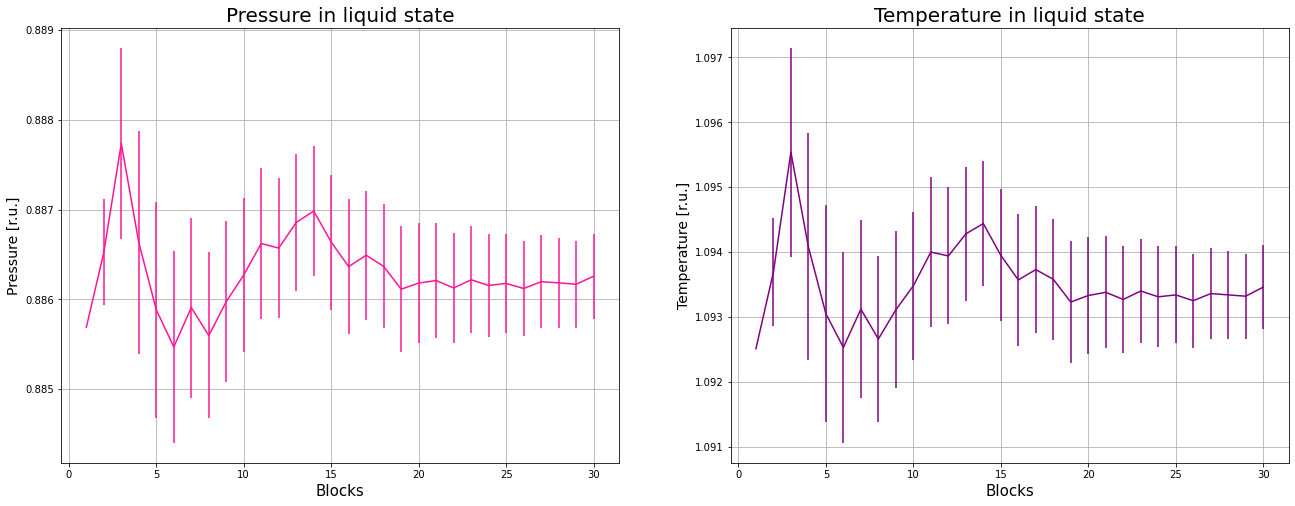

In [7]:
#import data for liquid simulation
n_block, etot, err_etot = np.loadtxt("data_folder/liquid_etot.dat", dtype=float, usecols=(0,2,3), delimiter=",", unpack='true')
epot, err_epot = np.loadtxt("data_folder/liquid_epot.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')
ekin, err_ekin = np.loadtxt("data_folder/liquid_ekin.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')
press, err_press = np.loadtxt("data_folder/liquid_press.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')
temp, err_temp = np.loadtxt("data_folder/liquid_temp.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')

#energy plots
fig, [ax0 , ax1 , ax2] = plt.subplots(1, 3, figsize=(22 , 8))
ax0.errorbar(n_block, etot , yerr=err_etot, color="navy")
ax1.errorbar(n_block, epot , yerr=err_epot, color="mediumslateblue")
ax2.errorbar(n_block, ekin , yerr=err_ekin, color="royalblue")

ax0.set_title("Total Energy in liquid state", fontsize = 20)
ax0.set_ylabel("Total Energy per particle [r.u.]", fontsize = 14)
ax1.set_title("Potential Energy in liquid state", fontsize = 20)
ax1.set_ylabel("Potenetial Energy per particle [r.u.]", fontsize = 14)
ax2.set_title("Kinetic Energy in liquid state", fontsize = 20)
ax2.set_ylabel("Kinetic Energy per particle[r.u.]", fontsize = 14)
for i in range(3):
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].grid(True)

#temperature and pressure plots
fig, [ax0 , ax1]   = plt.subplots(1, 2, figsize=(22 , 8))
ax0.errorbar( n_block, press, yerr=err_press, color="deeppink")
ax1.errorbar( n_block, temp, yerr=err_temp, color="purple")

ax0.set_title("Pressure in liquid state", fontsize = 20)
ax0.set_ylabel("Pressure [r.u.]", fontsize = 14)
ax1.set_title("Temperature in liquid state", fontsize = 20)
ax1.set_ylabel("Temperature [r.u.]", fontsize = 14)

for i in range(3):
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].grid(True)

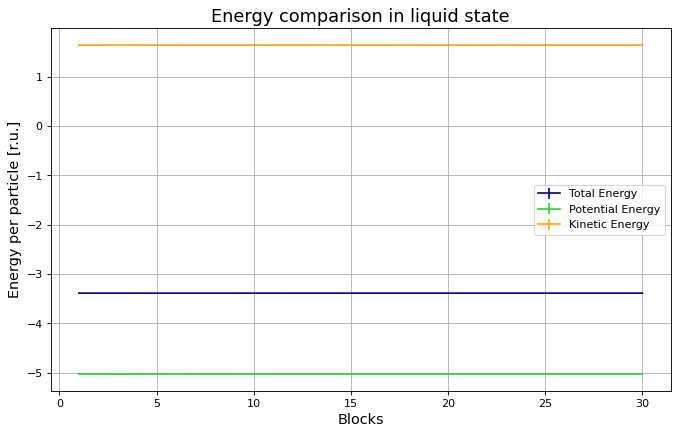

In [8]:
#energy comparison plots
figure(figsize=(10,6), dpi=80)
plt.errorbar(n_block, etot, yerr=err_etot, color="navy" , label="Total Energy" )
plt.errorbar(n_block, epot, yerr=err_epot , color="limegreen" , label="Potential Energy" )
plt.errorbar(n_block, ekin, yerr=err_ekin, color="orange" , label="Kinetic Energy" )
plt.xlabel('Blocks', fontsize = 13)
plt.ylabel('Energy per particle [r.u.]', fontsize = 13)
plt.title('Energy comparison in liquid state' , fontsize = 16)
plt.grid(True)
plt.legend(loc="best")
plt.show()

La fase liquida dell'Argon è stata simulata a $T = 1.1\,r.u. = 132\,K$, con $\rho = 0.8\,r.u. \approx 0.031 \cdot 10^{-27}\,m^{-3}$ e $r_{cutoff} = 2.5\,r.u. = 0.85\,nm$. Il grafico di paragone delle energie mostra la buona conservazione dell'energia totale, cinetica e potenziale.
La simulazione è stata eseguita con $30$ blocchi da $2\cdot10^4$ step ciascuno. Poichè ogni step è un'evoluzione di $t = 5\cdot10^{-4}\:r.u.$ il tempo totale della simulazione è $t \approx 0,12\:ns$.

### Gaseous state

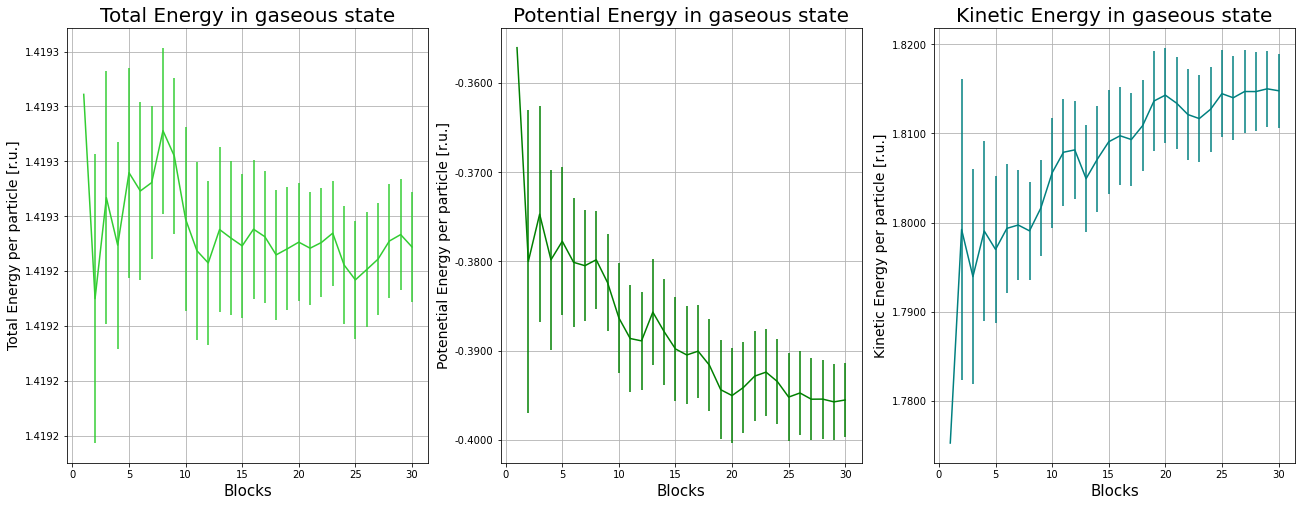

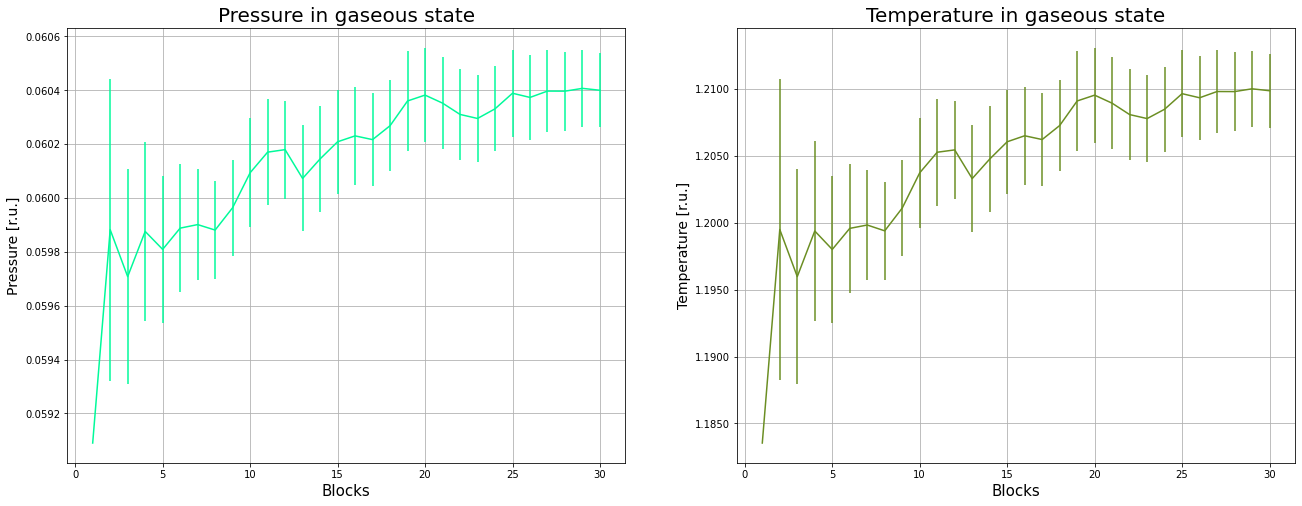

In [10]:
#import data for gas simulation
n_block, etot, err_etot = np.loadtxt("data_folder/gas_etot.dat", dtype=float, usecols=(0,2,3), delimiter=",", unpack='true')
epot, err_epot = np.loadtxt("data_folder/gas_epot.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')
ekin, err_ekin = np.loadtxt("data_folder/gas_ekin.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')
press, err_press = np.loadtxt("data_folder/gas_press.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')
temp, err_temp = np.loadtxt("data_folder/gas_temp.dat", dtype=float, usecols=(2,3), delimiter=",", unpack='true')

#energy plots
fig, [ax0 , ax1 , ax2]   = plt.subplots(1, 3, figsize=(22 , 8))
ax0.errorbar( n_block, etot , yerr=err_etot , color="limegreen")
ax1.errorbar( n_block, epot , yerr=err_epot , color="green")
ax2.errorbar( n_block, ekin , yerr=err_ekin, color="teal")

ax0.set_title("Total Energy in gaseous state", fontsize = 20)
ax0.set_ylabel("Total Energy per particle [r.u.]", fontsize = 14)
ax1.set_title("Potential Energy in gaseous state", fontsize = 20)
ax1.set_ylabel("Potenetial Energy per particle [r.u.]", fontsize = 14)
ax2.set_title("Kinetic Energy in gaseous state", fontsize = 20)
ax2.set_ylabel("Kinetic Energy per particle [r.u.]", fontsize = 14)
for i in range(3):
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].grid(True)
    globals()['ax'+str(i)].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))

#temperature and pressure plots
fig, [ax0 , ax1]   = plt.subplots(1, 2, figsize=(22 , 8))
ax0.errorbar( n_block, press , yerr=err_press , color="mediumspringgreen")
ax1.errorbar( n_block, temp , yerr=err_temp , color="olivedrab")

ax0.set_title("Pressure in gaseous state", fontsize = 20)
ax0.set_ylabel("Pressure [r.u.]", fontsize = 14)
ax1.set_title("Temperature in gaseous state", fontsize = 20)
ax1.set_ylabel("Temperature [r.u.]", fontsize = 14)

for i in range(3):
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].grid(True)
    globals()['ax'+str(i)].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))

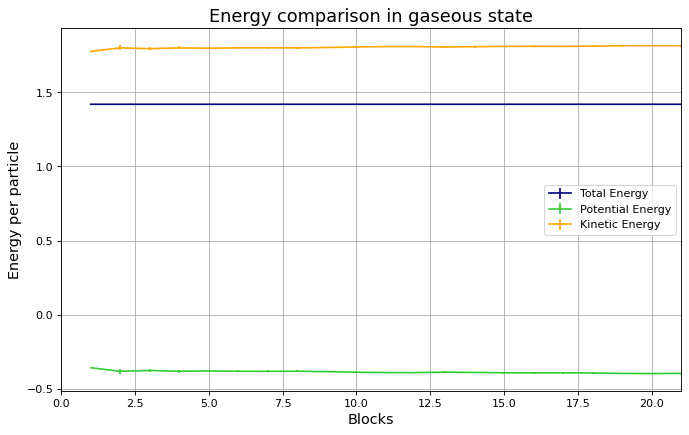

In [11]:
#energy comparison plots
figure(figsize=(10,6), dpi=80)
plt.errorbar(n_block, etot, yerr=err_etot, color="navy" , label="Total Energy" )
plt.errorbar(n_block, epot, yerr=err_epot , color="limegreen" , label="Potential Energy" )
plt.errorbar(n_block, ekin, yerr=err_ekin, color="orange" , label="Kinetic Energy" )
plt.xlabel('Blocks', fontsize = 13)
plt.xlim(0,21)
plt.ylabel('Energy per particle', fontsize = 13)
plt.title('Energy comparison in gaseous state' , fontsize = 16)
plt.grid(True)
plt.legend(loc="best")
plt.show()

La fase gassosa dell'Argon è stata simulata a $T = 1.2\,r.u. = 144\,K$, con $\rho = 0.05\,r.u. \approx 1,965 \cdot 10^{-30}\,m^{-3}$ e $r_{cutoff} = 5\,r.u. = 1.7\,nm$. Il grafico di paragone delle energie mostra la conservazione dell'energia totale e le piccole oscillazioni iniziali di energia cinetica e potenziale. <br>
Il piccolo abbassamento dell'energia potenziale prima di equilibrarsi riporta a quanto già spiegato riguardo all'aumento di temperatura iniziale nello stato gassoso: la grande distanza tra le molecole fa sì che il potenziale di Lennard-Jones sia attrattivo durante i primi step del sistema. La diminuzione di energia potenziale porta ad un aumento di energia cinetica in quanto nell'ensemble microcanonico l'energia totale deve rimanere costante. <br>
La simulazione è stata eseguita con $30$ blocchi da $2\cdot10^4$ step ciascuno. Poichè ogni step è un'evoluzione di $t = 5\cdot10^{-4}\:r.u.$ il tempo totale della simulazione è $t \approx 0,12\:ns$.

## Convertire da unità ridotte a SI
Le unità ridotte sono convenienti perchè adimensionali e generiche, ovvero molte combinazioni di $\rho$, $T$, $\epsilon$ e $\sigma$ corrispondono allo stesso stato in unità ridotte (Legge degli Stati Corrispondenti). Il loro ordine di grandezza evita inoltre problemi di underflow o di overflow.

Le unità ridotte dell'Argon date le condizioni sono: 
- l'unità di lunghezza $\sigma = 0.34\:nm$;
- l'unità di energia $\frac{\epsilon}{k_B} = 120\:K$;
- l'unità di massa $m = 39.948\:amu$;

Quindi, per riconvertire da unità di Lennard Jones ad unità di misura del SI basta rimoltiplicare per le corrispettive unità, a cui aggiungiamo anche il tempo:
- lunghezza: $r = \sigma r^\star$
- temperatura: $T = \frac{\epsilon}{k_B} T^\star$
- energia: $E = \epsilon E^\star$
- tempo: $t = \sqrt{\frac{m\sigma^2}{\epsilon}} t^\star$
- pressione: $P = \frac{\sigma^3}{\epsilon}P^\star$